<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid gray 2px; padding: 20px"> 
 
**Cсылка с проектом на nbviewer**   
https://nbviewer.org/github/AnastasiaGaida/Data_Analyst/blob/0c721f733f2fc8e9e4d9ca0edb70265443b70219/%D0%9E%D1%86%D0%B5%D0%BD%D0%BA%D0%B0%20%D1%80%D0%B5%D0%B7%D1%83%D0%BB%D1%8C%D1%82%D0%B0%D1%82%D0%BE%D0%B2%20AB-%D1%82%D0%B5%D1%81%D1%82%D0%B0/%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82%20%D1%81%20%D0%B8%D0%BD%D1%82%D0%B5%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%B2%D0%BD%D1%8B%D0%BC%D0%B8%20%D0%B4%D0%B8%D0%B0%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0%D0%BC%D0%B8%20Plotly/%D0%9E%D1%86%D0%B5%D0%BD%D0%BA%D0%B0%20%D1%80%D0%B5%D0%B7%D1%83%D0%BB%D1%8C%D1%82%D0%B0%D1%82%D0%BE%D0%B2%20AB-%D1%82%D0%B5%D1%81%D1%82%D0%B0.ipynb


# Содержание
    
[Описание проекта](#project)

1. [Загрузка данных и их подготовка к исследованию](#start)

2.  [Оценка корректности проведения теста.](#technical_task0)

    2.1. [Соответствие данных требованиям технического задания.](#technical_task1)

    2.2. [Проверка распределения пользователей.](#technical_task2)

    2.3. [Совпадение маркетинговых событий с тестированием.](#events3)
    
    
3. [Исследовательский анализ данных.](#analysis0)

    3.1. [Распределение регистраций пользователей по дням.](#analysis1)
 
    3.2. [Регистрация пользователей по устройствам.](#analysis2)

    3.3. [Количество событий на пользователя.](#analysis3)
    
    3.4. [Распределение событий пользователей по дням.](#analysis4)
    
    3.5. [Анализ изменения конверсии в воронке на разных этапах.](#analysis5)
    
    3.6. [Особенности данных, которые нужно учесть, прежде чем приступать к A/B-тестированию.](#analysis6)

4. [Оценка результатов A/B-тестирования.](#result0)

    4.1. [Результаты A/В-тестирования.](#result1)

    4.2. [Проверка статистической разницы долей z-критерием.](#test)
    
5. [Выводы по результатам A/B-тестирования.](#rec)


<a id="project"></a> 
# Описание проекта


# A/B-тестирование

# Постановка задачи
Провести оценку результатов A/B-теста. В вашем распоряжении есть датасет с действиями пользователей, техническое задание и несколько вспомогательных датасетов.

Оцените корректность проведения теста и проанализируйте его результаты.

Чтобы оценить корректность проведения теста:

- удостоверьтесь, что нет пересечений с конкурирующим тестом и нет пользователей, участвующих в двух группах теста одновременно;
- проверьте равномерность распределения пользователей по тестовым группам и правильность их формирования.

Подробнее об этом мы рассказываем в разделе «Как выполнить задание» в конце урока.





# Техническое задание

- Название теста: `recommender_system_test`;
- группы: А — контрольная, B — новая платёжная воронка;
- дата запуска: 2020-12-07;
- дата остановки набора новых пользователей: 2020-12-21;
- дата остановки: 2021-01-04;
- аудитория: в тест должно быть отобрано 15% новых пользователей из региона EU;
- назначение теста: тестирование изменений, связанных с внедрением улучшенной рекомендательной системы;
- ожидаемое количество участников теста: 6000.
- ожидаемый эффект: за 14 дней с момента регистрации пользователи покажут улучшение каждой метрики не менее, чем на 10%:
    - конверсии в просмотр карточек товаров — событие `product_page`,
    - просмотры корзины — `product_cart`,
    - покупки — `purchase`.
    
    
    
# Данные

[final_ab_events.csv](https://disk.yandex.ru/d/pgKgZ9lRp0Enwg)

[ab_project_marketing_events.csv](https://disk.yandex.ru/d/ZVC7GUYYckKnGQ)

[final_ab_new_users.csv](https://disk.yandex.ru/d/Qrto8Gerpu424g)

[final_ab_participants.csv](https://disk.yandex.ru/d/nhGUR3ZkNIG4VA)


# Описание данных

`ab_project_marketing_events.csv` — календарь маркетинговых событий на 2020 год.

Структура файла:

- `name` — название маркетингового события;
- `regions` — регионы, в которых будет проводиться рекламная кампания;
- `start_dt` — дата начала кампании;
- `finish_dt` — дата завершения кампании.

`final_ab_new_users.csv` — пользователи, зарегистрировавшиеся с 7 до 21 декабря 2020 года.

Структура файла:

- `user_id` — идентификатор пользователя;
- `first_date` — дата регистрации;
- `region` — регион пользователя;
- `device` — устройство, с которого происходила регистрация.

`final_ab_events.csv` — действия новых пользователей в период с 7 декабря 2020 по 4 января 2021 года.

Структура файла:

- `user_id` — идентификатор пользователя;
- `event_dt` — дата и время события;
- `event_name` — тип события;
- `details` — дополнительные данные о событии. Например, для покупок, `purchase,` в этом поле хранится стоимость покупки в долларах.

`final_ab_participants.csv` — таблица участников тестов.

Структура файла:

- `user_id` — идентификатор пользователя;
- `ab_test` — название теста;
- `group` — группа пользователя.


# Декомпозиция


- Исследование данных:
    - Требуется ли преобразование типов?
    - Поиск пропущенных значений и дубликатов.
- Оценка корректности проведения теста. Обратить внимание на:
    - Соответствие данных требованиям технического задания. Проверить корректность всех пунктов технического задания.
    - Время проведения теста. Проверка на совпадение с маркетинговыми и другими активностями.
    - Аудиторию теста. Удостоверься, что нет пересечений с конкурирующим тестом и нет пользователей, участвующих в двух группах теста одновременно. Проверить равномерность распределения по тестовым группам и правильность их формирования.
- Исследовательский анализ данных:
    - Распределение количества событий на пользователя в выборках.
    - Как число событий в выборках распределено по дням.
    - Как меняется конверсия в воронке в выборках на разных этапах.
    - Какие особенности данных нужно учесть, прежде чем приступать к A/B-тестированию.
- Оценка результатов A/B-тестирования
    - Что можно сказать про результаты A/В-тестирования?
    - Проверка статистической разницы долей z-критерием.
- Выводы по этапу исследовательского анализа данных и по проведённой оценке результатов A/B-тестирования. Общее заключение о корректности проведения теста.

### Загрузка данных и их подготовка к исследованию
<a id="start"></a> 

**Импорт необходимых для работы библиотек.**

In [1]:
!pip install -U kaleido

In [2]:
!pip install statsmodels

In [3]:
import pandas as pd
pd.set_option('display.max_colwidth', None) #код, который выводит максимальную ширину столбцов таблицы
pd.options.display.max_colwidth = 150
pd.set_option('display.max_columns', None) #код, который выводит все колонки таблицы
pd.options.display.float_format = '{:.2f}'.format #код отображает float с двумя знаками после точки

import datetime as dt

import numpy as np
import math as mth

from scipy import stats as st
from statsmodels.sandbox.stats.multicomp import multipletests


import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
sns.color_palette()

from plotly import graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots


import warnings
warnings.filterwarnings("ignore")

#### Открытие файла с данными и изучение общей информации.

In [4]:
try:
    events = pd.read_csv('/final_ab_events.csv')
    marketing = pd.read_csv('/ab_project_marketing_events.csv')
    users = pd.read_csv('/final_ab_new_users.csv')
    participants = pd.read_csv('/final_ab_participants.csv')
except:
    events = pd.read_csv('https://code.s3.yandex.net/datasets/final_ab_events.csv') 
    marketing = pd.read_csv('https://code.s3.yandex.net/datasets/ab_project_marketing_events.csv')
    users = pd.read_csv('https://code.s3.yandex.net/datasets/final_ab_new_users.csv')
    participants = pd.read_csv('https://code.s3.yandex.net/datasets/final_ab_participants.csv')
#    events = pd.read_csv(r'C:\Users\gaida\Downloads\final_ab_events.csv') 
#    marketing = pd.read_csv(r'C:\Users\gaida\Downloads\ab_project_marketing_events.csv')
#    users = pd.read_csv(r'C:\Users\gaida\Downloads\final_ab_new_users.csv')
#    participants = pd.read_csv(r'C:\Users\gaida\Downloads\final_ab_participants.csv')    

In [5]:
#функция для ознакомления с основной информацией
def information_df(metod): 
    print('\033[1m' +  'Ознакомимся с таблицей, для этого выведем первые 5 строк на экран.' + '\033[0m')
    display(metod.head())
    print('-'* 25)    
    print('\033[1m' +  'Выведем основную информацию таблицы с помощью метода info().' + '\033[0m')
    print(' ')
    display(metod.info())
    print('\033[1m' +  'Размер датафрейма:' + '\033[0m', metod.shape)
    print('-'* 25)
    print('\033[1m' +  'Количество явных дубликатов  в таблице:' + '\033[0m', metod.duplicated().sum())
    print('-'* 25)
    print('\033[1m' +  'Количество пропущенных значений в таблице:' + '\033[0m')
    #display(metod.isna().sum())
    for col in metod.columns:
        #print('-'* 25)
        print('\033[1m' + col + '\033[0m', ': кол-во NaN', metod[col].isna().sum(),
       ', процент NaN', round(metod[col].isna().mean()*100,2),'%')
    print('-'* 25)
    #print('\033[1m' +  'Ознакомимся с данными таблицы методом describe().' + '\033[0m')
    #display(metod.describe())

***Изучим данные таблицы `'marketing'` - календарь маркетинговых событий на 2020 год.***

In [6]:
information_df(marketing)

Ознакомимся с таблицей, для этого выведем первые 5 строк на экран.


,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


-------------------------
Выведем основную информацию таблицы с помощью метода info().
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


None

Размер датафрейма: (14, 4)
-------------------------
Количество явных дубликатов  в таблице: 0
-------------------------
Количество пропущенных значений в таблице:
name : кол-во NaN 0 , процент NaN 0.0 %
regions : кол-во NaN 0 , процент NaN 0.0 %
start_dt : кол-во NaN 0 , процент NaN 0.0 %
finish_dt : кол-во NaN 0 , процент NaN 0.0 %
-------------------------


Рассмотрев исходные данные, можно выделить следующее:

- таблица состоит из 4 столбцов и 14 строк;


- явные дубликаты отсутствуют;


- пропуски отсутствуют;


- необходимо изменить тип данных в столбцах 'start_dt' и 'finish_dt'.

***Изучим данные таблицы `'events'` - действия новых пользователей в период с 7 декабря 2020 по 4 января 2021 года.***

In [7]:
information_df(events)

Ознакомимся с таблицей, для этого выведем первые 5 строк на экран.


,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


-------------------------
Выведем основную информацию таблицы с помощью метода info().
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     440317 non-null  object 
 1   event_dt    440317 non-null  object 
 2   event_name  440317 non-null  object 
 3   details     62740 non-null   float64
dtypes: float64(1), object(3)
memory usage: 13.4+ MB


None

Размер датафрейма: (440317, 4)
-------------------------
Количество явных дубликатов  в таблице: 0
-------------------------
Количество пропущенных значений в таблице:
user_id : кол-во NaN 0 , процент NaN 0.0 %
event_dt : кол-во NaN 0 , процент NaN 0.0 %
event_name : кол-во NaN 0 , процент NaN 0.0 %
details : кол-во NaN 377577 , процент NaN 85.75 %
-------------------------


Рассмотрев исходные данные, можно выделить следующее:

- таблица состоит из 4 столбцов и 440317 строк;


- явные дубликаты отсутствуют;


- пропуски имеются в столбце 'details', их объем 87,75%, это очень большой процент;


- необходимо изменить тип данных в столбце 'event_dt'.

***Изучим данные таблицы `'users'` - пользователи, зарегистрировавшиеся с 7 до 21 декабря 2020 года..***

In [8]:
information_df(users)

Ознакомимся с таблицей, для этого выведем первые 5 строк на экран.


,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


-------------------------
Выведем основную информацию таблицы с помощью метода info().
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     61733 non-null  object
 1   first_date  61733 non-null  object
 2   region      61733 non-null  object
 3   device      61733 non-null  object
dtypes: object(4)
memory usage: 1.9+ MB


None

Размер датафрейма: (61733, 4)
-------------------------
Количество явных дубликатов  в таблице: 0
-------------------------
Количество пропущенных значений в таблице:
user_id : кол-во NaN 0 , процент NaN 0.0 %
first_date : кол-во NaN 0 , процент NaN 0.0 %
region : кол-во NaN 0 , процент NaN 0.0 %
device : кол-во NaN 0 , процент NaN 0.0 %
-------------------------


Рассмотрев исходные данные, можно выделить следующее:

- таблица состоит из 4 столбцов и 61733 строк;


- явные дубликаты отсутствуют;


- пропуски отсутствуют;


- необходимо изменить тип данных в столбце 'first_date'.

***Изучим данные таблицы `'participants'` - таблица участников тестов.***

In [9]:
information_df(participants)

Ознакомимся с таблицей, для этого выведем первые 5 строк на экран.


,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test


-------------------------
Выведем основную информацию таблицы с помощью метода info().
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18268 entries, 0 to 18267
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  18268 non-null  object
 1   group    18268 non-null  object
 2   ab_test  18268 non-null  object
dtypes: object(3)
memory usage: 428.3+ KB


None

Размер датафрейма: (18268, 3)
-------------------------
Количество явных дубликатов  в таблице: 0
-------------------------
Количество пропущенных значений в таблице:
user_id : кол-во NaN 0 , процент NaN 0.0 %
group : кол-во NaN 0 , процент NaN 0.0 %
ab_test : кол-во NaN 0 , процент NaN 0.0 %
-------------------------


**Рассмотрев исходные данные, можно выделить следующее:**

- таблица состоит из 3 столбцов и 18268 строк;


- явные дубликаты отсутствуют;


- пропуски отсутствуют;


- у всех столбцов соответствующий им тип данных.

#### Изменение типа данных в необходимых столбцах.

In [10]:
marketing['start_dt'] = pd.to_datetime(marketing['start_dt'])
marketing['finish_dt'] = pd.to_datetime(marketing['finish_dt'])
events['event_dt'] = pd.to_datetime(events['event_dt'])
users['first_date'] = pd.to_datetime(users['first_date'])
display(marketing.dtypes)
display(events.dtypes)
display(users.dtypes)

name                 object
regions              object
start_dt     datetime64[ns]
finish_dt    datetime64[ns]
dtype: object

user_id               object
event_dt      datetime64[ns]
event_name            object
details              float64
dtype: object

user_id               object
first_date    datetime64[ns]
region                object
device                object
dtype: object

#### Изучение пропущенных данных.

Проверим как распределены события в данных с пропусками и без.

In [11]:
events['event_name'].unique()

array(['purchase', 'product_cart', 'product_page', 'login'], dtype=object)

In [12]:
events[events['details'].isna()]['event_name'].value_counts(normalize=True)

login          0.50
product_page   0.33
product_cart   0.17
Name: event_name, dtype: float64

In [13]:
events[events['details'].notna()]['event_name'].value_counts(normalize=True)

purchase   1.00
Name: event_name, dtype: float64

В данных с пропусками в столбце 'details' присутствуют только 3 события из 4 возможных. 

Следовательно пропуски относятся к типу MNAR (Missing Not At Random / Отсутствует не случайно) и напрямую зависят от значения 'purchase' в столбце 'event_name'. 

Столбец 'details' хранит в себе только данные о сумме покупки.

**Вывод по предобработке:**
- таблица 'marketing' - календарь маркетинговых событий на 2020 год.:
    - таблица состоит из 4 столбцов и 14 строк;
    
    - явные дубликаты отсутствуют;
    
    - пропуски отсутствуют;
    
    - необходимо изменить тип данных в столбцах 'start_dt' и 'finish_dt'.
    
- таблица 'events' - действия новых пользователей в период с 7 декабря 2020 по 4 января 2021 года:
    - таблица состоит из 4 столбцов и 440317 строк;

    - явные дубликаты отсутствуют;

    - пропуски имеются в столбце 'details', их объем 87,75%, это очень большой процент;

    - необходимо изменить тип данных в столбце 'event_dt'.

- таблица 'users' - пользователи, зарегистрировавшиеся с 7 до 21 декабря 2020 год:
    - таблица состоит из 4 столбцов и 61733 строк;

    - явные дубликаты отсутствуют;

    - пропуски отсутствуют;

    - необходимо изменить тип данных в столбце 'first_date'.
- таблица 'participants' - таблица участников тестов.
    - таблица состоит из 3 столбцов и 18268 строк;

    - явные дубликаты отсутствуют;

    - пропуски отсутствуют;

    - у всех столбцов соответствующий им тип данных.
    
Заменены типы данных в столбцах.

Рассмотрены пропуски в данных.

### Оценка корректности проведения теста.
<a id="technical_task0"></a> 

#### Соответствие данных требованиям технического задания.
<a id="technical_task1"></a> 

**Техническое задание**

- Название теста: `recommender_system_test`;
- группы: А — контрольная, B — новая платёжная воронка;
- дата запуска: 2020-12-07;
- дата остановки набора новых пользователей: 2020-12-21;
- дата остановки: 2021-01-04;
- аудитория: в тест должно быть отобрано 15% новых пользователей из региона EU;
- назначение теста: тестирование изменений, связанных с внедрением улучшенной рекомендательной системы;
- ожидаемое количество участников теста: 6000.
- ожидаемый эффект: за 14 дней с момента регистрации пользователи покажут улучшение каждой метрики не менее, чем на 10%:
    - конверсии в просмотр карточек товаров — событие `product_page`,
    - просмотры корзины — `product_cart`,
    - покупки — `purchase`.

Объединим таблицы 'users' с набором новых пользователей и таблицу 'participants' с участниками теста, чтобы проверить данные на соответствие ТЗ.

In [14]:
print('количество строк в таблице participants до объединения:', len(participants))
print('количество уникальных пользователей в таблице participants до объединения:', participants['user_id'].nunique())
test_data = participants.merge(users, on='user_id', how='left')
print('количество строк после объединения:', len(participants))
print('количество уникальных пользователей после объединения:', test_data['user_id'].nunique())
test_data.info()

количество строк в таблице participants до объединения: 18268
количество уникальных пользователей в таблице participants до объединения: 16666
количество строк после объединения: 18268
количество уникальных пользователей после объединения: 16666
<class 'pandas.core.frame.DataFrame'>
Int64Index: 18268 entries, 0 to 18267
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     18268 non-null  object        
 1   group       18268 non-null  object        
 2   ab_test     18268 non-null  object        
 3   first_date  18268 non-null  datetime64[ns]
 4   region      18268 non-null  object        
 5   device      18268 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 999.0+ KB


In [15]:
test_data.describe()

,user_id,group,ab_test,first_date,region,device
count,18268,18268,18268,18268,18268,18268
unique,16666,2,2,17,4,4
top,A4F18DF9C484EDC0,A,interface_eu_test,2020-12-21 00:00:00,EU,Android
freq,2,9655,11567,1903,17918,8155
first,NaN,NaN,NaN,2020-12-07 00:00:00,NaN,NaN
last,NaN,NaN,NaN,2020-12-23 00:00:00,NaN,NaN


Таблицы объединены без пропусков. В получившейся таблице:
- 16666 уникальных пользователя из 18268 (дубликатов быть не должно, далее подробнее рассмотрим дубликаты);
- уникальных групп 2 - верно;
- столбец ab_test содержит 2 уникальных значения, необходимо проверить;
- временной интервал 07.12.2020 - 23.12.2020;
- 4 уникальных региона и столько же устройств.

In [16]:
test_data['ab_test'].unique()

array(['recommender_system_test', 'interface_eu_test'], dtype=object)

В данных содержится информация по 2 разным тестам, один из которых соответствует нашему техническому заданию. Посмотрим информацию о таблице только с необходимым нам тестом.

In [17]:
test_data[test_data['ab_test'] == 'recommender_system_test'].describe()

,user_id,group,ab_test,first_date,region,device
count,6701,6701,6701,6701,6701,6701
unique,6701,2,1,15,4,4
top,4F095D257CB159C6,A,recommender_system_test,2020-12-21 00:00:00,EU,Android
freq,1,3824,6701,723,6351,2983
first,NaN,NaN,NaN,2020-12-07 00:00:00,NaN,NaN
last,NaN,NaN,NaN,2020-12-21 00:00:00,NaN,NaN


С фильтрацией только по нашему тесту дублирующихся id пользователей нет, следовательно проблема между тестами, а не группами нашего теста.

Также изменился диапазон дат регистрации, теперь он составляет 07.12.2020 - 21.12.2020.

Количество уникальных регионов и устройств не изменилось

***Проверка на соответствие данных датам в техническом задании.***
- дата запуска: 2020-12-07;
- дата остановки набора новых пользователей: 2020-12-21;
- дата остановки: 2021-01-04;

In [18]:
print('Временной интервал набора пользователей:', \
      test_data[test_data['ab_test'] == "recommender_system_test"]['first_date'].min(), '-', \
      test_data[test_data['ab_test'] == "recommender_system_test"]['first_date'].max())

print('Временной интервал тестирования:', \
      events['event_dt'].min(), '-', \
      events['event_dt'].max())


Временной интервал набора пользователей: 2020-12-07 00:00:00 - 2020-12-21 00:00:00
Временной интервал тестирования: 2020-12-07 00:00:33 - 2020-12-30 23:36:33


Так как мы проверили распределение дат регистрации пользователей, попавших в тест recommender_system_test выше, то можно отметить, что:
- дата остановки набора новых пользователей: 2020-12-21 по тесту recommender_system_test соответствует техническому заданию.
- также можно отметить, что в таблице с событиями пользователей имеются данные до 30.12.2020, а следовательно, по каким-то причинам тест закончился раньше.

Так как нас интересует временной диапазон набора новых пользователей только по тесту recommender_system_test, отфильтруем таблицу users от лишних дат.

In [19]:
events_filtr = events.copy()
users_filtr = users.query('("2020-12-07" <= first_date <= "2020-12-21")')

**Проверим соответствие аудитории на соответствие технического задания:**
- в тест должно быть отобрано 15% новых пользователей из региона EU;
- ожидаемое количество участников теста: 6000.

In [20]:
test_data = test_data.query('region == "EU"')

***Найдем процент пользователей по нашему тесту recommender_system_test и региону EU.***

In [21]:
percent_user = len(test_data.query('ab_test=="recommender_system_test"'))/len(users_filtr.query('region == "EU"'))                                 
print(f'Процент пользователей теста от общего объема новых пользователей из региона EU: {percent_user:.2%}')

Процент пользователей теста от общего объема новых пользователей из региона EU: 15.00%


Процент пользователей теста из EU совпадает с техническим заданием.

***Проверим получившееся количество пользователей из региона EU и теста recommender_system_test на соответствие ожидаемому количеству участников теста (6000).***

In [22]:
count_user = len(test_data.query('ab_test=="recommender_system_test"'))  
print(f'Количество пользователей из региона EU в тесте: {count_user:.0f}')

Количество пользователей из региона EU в тесте: 6351


Количество пользователей совпадает с техническим заданием.

#### Проверка распределения пользователей.
<a id="technical_task2"></a> 

В таблице participants данные по 2 разным тестам, один из которых соответствует нашему техническому заданию. 

Проверим задублировавшихся пользователей.

In [23]:
# таблица с дубликатами
participants_dupl = test_data[test_data['user_id'].duplicated(keep=False)]
participants_dupl['user_id'].duplicated().sum()

1602

In [24]:
participants_dupl.pivot_table(index=['ab_test', 'group'], values='user_id', aggfunc='count')

user_id
ab_test                 group         
interface_eu_test       A          819
                        B          783
recommender_system_test A          921
                        B          681

Всего 1602 дубликата (3204 строки). 

Из них 819 пользователей из группы А другого теста. На данных пользователей не распространяются вводимые изменения, а следовательно их можно оставить и в нашем тесте. 

Однако остальные 783 пользователя принадлежат группе B второго теста. На таких пользователей могут повлиять вводимые изменения другого теста. Таких пользователей следует либо удалить, либо, для того чтобы не снижать мощность нашего теста, проверить как пользователи группы В теста interface_eu_test распределены между группами нашего теста.

**Проверим как пользователи группы В теста "interface_eu_test" распределены между группами теста "recommender_system_test".**

Проверка гипотезы о равенстве долей

**Нулевая гипотеза: Н0 = Различий между выборками группы А и группы В нет.**

**Альтернативная гипотеза: H_a: = Различия между выборками группы А и группы В есть.**

В качестве уровня критической значимости установим 0.05     

In [25]:
# дубликаты группы А теста recommender_system_test
A_2_user_id = participants_dupl.query('(ab_test == "interface_eu_test") and (group == "A")')['user_id']
#удалим из таблицы с дубликатами пользователей группы А теста interface_eu_test, а из оставшихся пользователей В того же теста
participants_dupl_del = participants_dupl.query('(user_id not in @A_2_user_id)')#['user_id']
# удалим пользователей В теста interface_eu_test

In [26]:
#Составим таблицу с количеством пользователей по событиям для каждой группы.
dupl_pivot = pd.concat([
    test_data.query('ab_test=="recommender_system_test"').pivot_table(
        index=['group'], values='user_id', aggfunc='count').rename(columns={'user_id': 'all_count'}),#общее распределение
    participants_dupl_del.query('ab_test == "recommender_system_test"').pivot_table(
        index=['group'], values='user_id', aggfunc='count').rename(columns={'user_id': 'dubl_count'}),#распределение в дубликатах
]
    ,axis=1
)
display(dupl_pivot)

,all_count,dubl_count
group,,
A,3634,439
B,2717,344


In [27]:

#выделим необходимые строки столбца с помощью индекса и запишем значение в отдельные переменные
successes1 = dupl_pivot[dupl_pivot.index == "A"]['dubl_count'].iat[0]
trials1 = dupl_pivot[dupl_pivot.index == "A"]['all_count'].iat[0]
successes2 = dupl_pivot[dupl_pivot.index == "B"]['dubl_count'].iat[0]
trials2 = dupl_pivot[dupl_pivot.index == "B"]['all_count'].iat[0]


successes = np.array([successes1, successes2])
trials = np.array([trials1, trials2])

alpha = .05 # критический уровень статистической значимости
# пропорция успехов в первой группе:
p1 = successes[0]/trials[0]

# пропорция успехов во второй группе:
p2 = successes[1]/trials[1]
    
    # пропорция успехов в комбинированном датасете:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# разница пропорций в датасетах
difference = p1 - p2 

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1)  

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)
if p_value < alpha:
    print('Отвергаем H0: между долями есть значимая разница')
    print(' ')
else:
    print('\033[1m' + 'Не получилось отвергнуть H0: нет оснований считать доли разными' + '\033[0m')
    print(' ')

p-значение:  0.4861791801372526
Не получилось отвергнуть H0: нет оснований считать доли разными
 


p-значение больше уровня критической значимости, следовательно, нулевую гипотезу " Различий между выборками группы А и группы В нет." не отвергаем.

Статистически значимых различий между контрольными группами нет.

**На основании результатов статистического теста убирать дублирующихся пользователей не будем.**

Удалим из отфильтрованной  таблицы второй тест, оставив только данные по тесту recommender_system_test. 

А также проверим распределение пользователей на группы в тесте recommender_system_test.

In [28]:
test_data = test_data.query('ab_test=="recommender_system_test"')

In [29]:
print('Количество уникальных пользователей таблицы с тестом recommender_system_test:', 
      test_data['user_id'].nunique())
print('Количество дублирующихся пользователей теста recommender_system_test:', 
      test_data['user_id'].duplicated().sum())
display(test_data['group'].value_counts(normalize=True).apply('{:.2%}'.format))

Количество уникальных пользователей таблицы с тестом recommender_system_test: 6351
Количество дублирующихся пользователей теста recommender_system_test: 0


A    57.22%
B    42.78%
Name: group, dtype: object

В тесте recommender_system_test отсутствуют дубликаты, а следовательно, пересекающихся пользователей между группами нет.

Группа А включает в себя большее количество пользователей.

***По техническому заданию эффективность поведения пользователей необходимо оценить на 14 день после регистрации. Проверим соответствие данного пункта.***

Информация о совершенных пользователем событиях находится в таблице events. Объединим таблицы.

In [30]:
test_data = test_data.merge(events, on='user_id', how='left')

In [31]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26290 entries, 0 to 26289
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     26290 non-null  object        
 1   group       26290 non-null  object        
 2   ab_test     26290 non-null  object        
 3   first_date  26290 non-null  datetime64[ns]
 4   region      26290 non-null  object        
 5   device      26290 non-null  object        
 6   event_dt    23420 non-null  datetime64[ns]
 7   event_name  23420 non-null  object        
 8   details     3196 non-null   float64       
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 2.0+ MB


In [32]:
nan_events = test_data[(test_data['event_name'].isna())& (test_data['event_dt'].isna())]

print(
    'Количество пользователей, не совершивших ни одного события за период проведения тестирования:', 
      nan_events['user_id'].nunique()
      )

print(
    f'Доля пользователей без событий: {nan_events.user_id.nunique() / test_data.user_id.nunique():.2%}'
      )

display(
    'Распределение по группам пользователей без событий:', 
      nan_events['group'].value_counts(normalize=True).apply('{:.2%}'.format)
      )

Количество пользователей, не совершивших ни одного события за период проведения тестирования: 2870
Доля пользователей без событий: 45.19%


'Распределение по группам пользователей без событий:'

B    64.11%
A    35.89%
Name: group, dtype: object

При объединении таблиц образовались пропущенные значения. Это говорит о том, что пользователи не совершили после регистрации ни одного события:
- размер таких пользователей - 2870;
- их объем - 45,19%
- распределение между группами: группа А - 64,11%, группа В - 35,89% 

Так как по таким пользователям у нас не хватает необходимой информации, удалим строки с пропусками (кроме столбца details)

In [33]:
#сохраним копию со всеми пользователями
events_filtr = test_data.copy()

In [34]:
test_data = test_data.dropna(subset=['event_name','event_dt']).reset_index(drop=True)
test_data.user_id.nunique()

3481

Теперь рассмотрим на какой день после регистрации пользователи совершают первое событие.

In [35]:
print('Количество событий:' ,test_data['event_name'].count())
print('Количество уникальных пользователей:' ,test_data['user_id'].nunique())

Количество событий: 23420
Количество уникальных пользователей: 3481


In [36]:
test_data['days'] =  ((test_data['event_dt'] - test_data['first_date']) / np.timedelta64 ( 1 , 'D')).astype('int')
print('Количество событий, которые совершаются более, чем на 14 день:' ,test_data[test_data.days > 14]['days'].count())
test_data = test_data[test_data.days <= 14]
print('Количество событий:' ,test_data['event_name'].count())
print('Количество уникальных пользователей:' ,test_data['user_id'].nunique())

Количество событий, которые совершаются более, чем на 14 день: 592
Количество событий: 22828
Количество уникальных пользователей: 3481


Количество событий, которые совершаются более, чем на 14 день - 592. 

Такие события нам не подходят по техническому заданию, поэтому они были отфильтрованы.

Количество уникальных пользователей не изменилось.

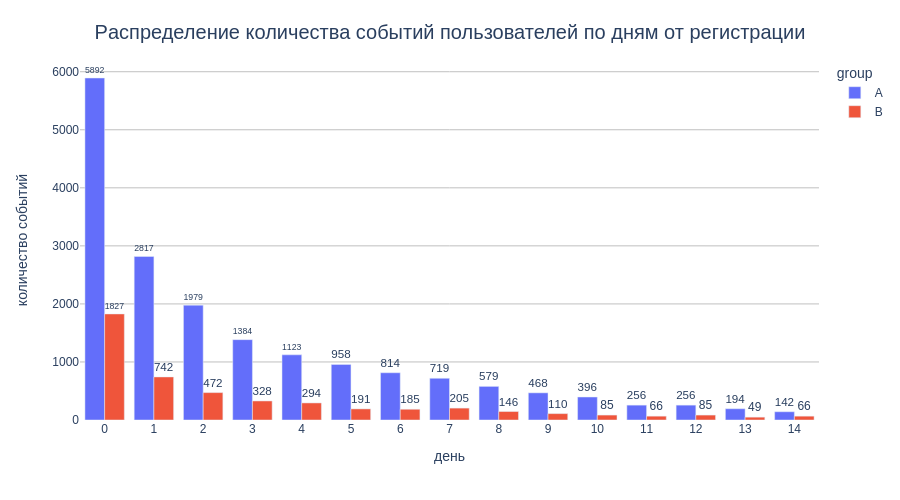

In [37]:
fig = go.Figure()
fig = px.bar(test_data.pivot_table(index=['days', 'group'], values='user_id', aggfunc='count').reset_index(), 
             x = 'days', y= 'user_id', color= 'group', 
             text='user_id',barmode ='group'
).update_xaxes(categoryorder='total descending')

fig.update_traces(textposition='outside')
fig.update_layout(
    {'title':{'text':'Pаспределение количества событий пользователей по дням от регистрации', 'x': 0.5, 'y': 0.95, 'font_size': 20}},
    plot_bgcolor='white',
    autosize=False,
    width=900,
    height=500,
)
fig.update_xaxes(title_text='день', showgrid=False, gridcolor='silver', dtick=1)
fig.update_yaxes(title_text='количество событий', showgrid=True, gridcolor='silver')

#fig.show() #показать диаграмму
fig.show("png") #показать диаграмму для Github

Рассмотрев распределение количества событий по дням, можно отметить, что основная часть пользователей совершает действия в день регистрации. Далее, чем больше день, тем меньше количество событий.

#### Совпадение маркетинговых событий с тестированием.
<a id="events3"></a> 

In [38]:
marketing.query('(start_dt <= "2021-01-04") and (finish_dt >= "2020-12-07")')

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
10,CIS New Year Gift Lottery,CIS,2020-12-30,2021-01-07


В период проведения тестирования также осуществлялись 2 маркетингового события. Однако только акция Christmas&New Year Promo распространяется на жителей региона EU, следовательно клиенты тестирования попали под её воздействие.

Рассмотрим, менялось ли поведение пользователей по событиям при запуске акции.

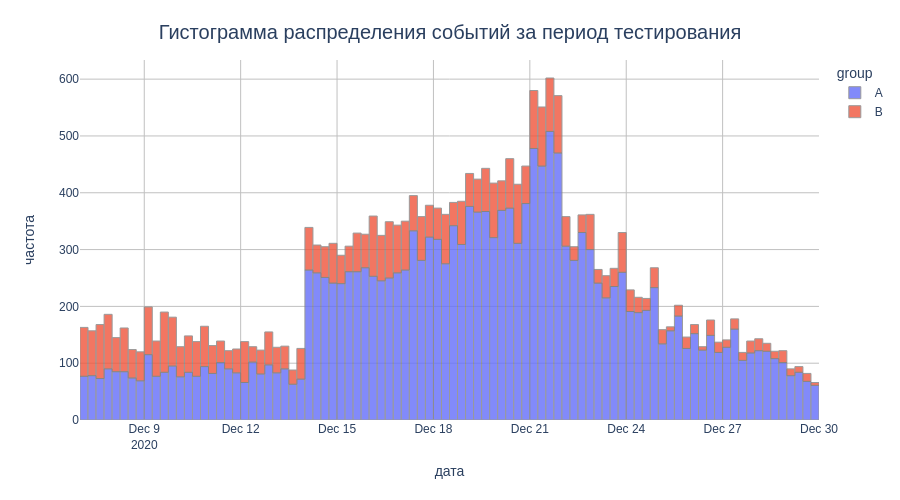

In [39]:
fig = go.Figure()

fig = px.histogram(test_data, x='event_dt', color='group')


fig.update_layout({'title':{'text':'Гистограмма распределения событий за период тестирования', 
                            'x': 0.5, 'y': 0.95, 'font_size': 20}},
                  autosize=False,
                  width=900,
                  height=500,
                  plot_bgcolor='white')
fig.update_traces(marker_line_color = 'gray', marker_line_width = 1, opacity = 0.8)
fig.update_xaxes(title_text='дата', showgrid=True, gridcolor='silver')
fig.update_yaxes(title_text='частота', showgrid=True, gridcolor='silver')

#fig.show() #показать диаграмму
fig.show("png") #показать диаграмму для Github

Рассмотрев распределение событий, за период проведения маркетингового события значительного роста или снижения количества событий не наблюдается, события имеют тенденцию к постепенному снижению как до начала акции, так и после. Пик диаграммы приходится на 21 декабря.

Однако на диаграмме заметен значительный скачек на 14 декабря, так как он не зависит от маркетингового события, то, есть предположение, что его вызвало либо количество регистраций, либо тотальная закупка пользователей к Рождеству. Постараемся найти, чем вызван такой значительный рост заказов в следующем разделе.

Также следует отметить, что тестирование проводится в предпраздничный период, что является негативным фактором проведения А/В теста, так как календарные события и праздники значительно искажают покупательский спрос и, следовательно, могут повлиять и на результаты проведения тестирования, а именно исказить и их. 

***Проверка распределения в данных, а также анализ их пригодности для А/В тестирования завершены. Повторно проверим, насколько сильно изменились показатели соответствия техническому заданию***

In [40]:
test_data
print('Временной интервал событий:', \
      test_data['event_dt'].min(), '-', \
      test_data['event_dt'].max())
print(' ')
print('Временной интервал регистрации:', \
      test_data['first_date'].min(), '-', \
      test_data['first_date'].max())
print(' ')
percent_user = test_data['user_id'].nunique()/len(users_filtr.query('region == "EU"'))                                 
print(f'Процент пользователей теста от общего объема новых пользователей из региона EU: {percent_user:.2%}')
print(' ')
count_user = test_data['user_id'].nunique()
print(f'Количество пользователей из региона EU в тесте: {count_user:.0f}')
print(' ')
display('Распределение пользователей по группам теста:', test_data['group'].value_counts(normalize=True).apply('{:.2%}'.format))

Временной интервал событий: 2020-12-07 00:05:57 - 2020-12-29 23:38:29
 
Временной интервал регистрации: 2020-12-07 00:00:00 - 2020-12-21 00:00:00
 
Процент пользователей теста от общего объема новых пользователей из региона EU: 8.22%
 
Количество пользователей из региона EU в тесте: 3481
 


'Распределение пользователей по группам теста:'

A    78.75%
B    21.25%
Name: group, dtype: object

**По завершении обработки данных на соответствие А/В тестированию:**
- **временной интервал набора пользователей - соответствует** тех. заданию;

- **временной интервал тестирования - дата начала соответствует, дата окончания не соответствует** (не соответствовал и по начальным данным, отфильтрованный - смещение на -1 день);

- **процент набора новых пользователей из региона EU в тест** - не соответствует техническому заданию и составляет 8,22% (**соответствовал по начальным данным**);

- **количество пользователей** не соответствует ожидаемому количеству участников теста в тех. задании (**соответствовало по начальным данным**, однако, на этапе проверки количества событий по пользователям, 45,19% не совершили ни одного события. Что привело к недостатку для исследования данных и сокращению ожидаемого количества пользователей для проведения тестирования);

- данных на 14 день с момента регистрации пользователя слишком мало, поэтому рассматриваться метрики будут за 1-14 дни регистрации пользователя.

- Распределение на группы тестирования неравномерное, группа А имеет вес 78,75%, а группа В 21,25%.

### Исследовательский анализ данных
<a id="analysis0"></a> 

In [41]:
test_data['event_date'] = test_data['event_dt'].dt.date

#### Распределение регистраций пользователей по дням.
<a id="analysis1"></a> 

In [42]:
reg_count = test_data.pivot_table(index=['group', 'first_date'], values='user_id', aggfunc='nunique').reset_index()

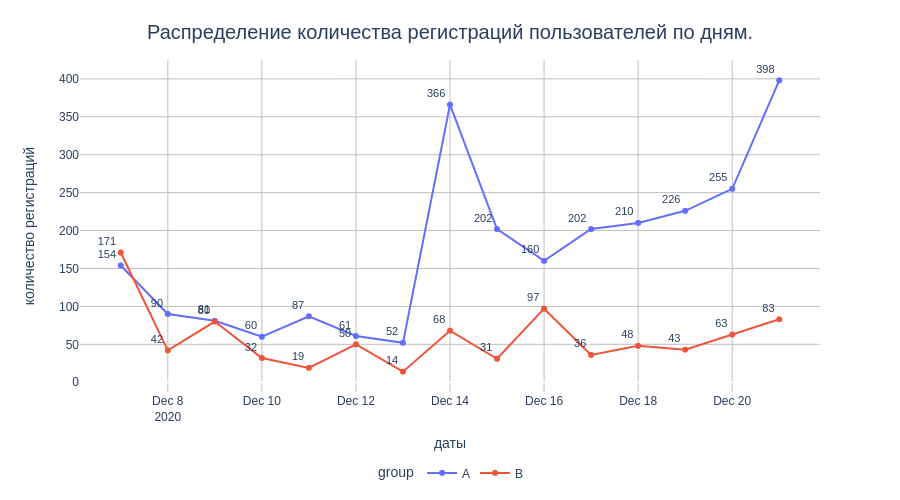

In [43]:
fig = px.line(reg_count, x='first_date', y='user_id', color='group', text='user_id')

#зададим параметры диаграмм
fig.update_layout(
        {'title':{'text':'Распределение количества регистраций пользователей по дням.', 
                  'x': 0.5, 'y': 0.95, 'font_size': 20}}, #название общей диаграммы, расположение текста, размер текста
        barmode = 'group', #вид диаграмм
        legend_orientation="h", 
        legend=dict(x=0.4, y=-0.2),#положение легенды
        autosize=False,
        width=900,
        height=500,
        paper_bgcolor='white',
        plot_bgcolor='white', #фоновый цвет диаграмм
        uniformtext_minsize=8, #мин. размер шрифта данных,
    )
fig.update_traces(textposition='top left', textfont_size=11)
fig.update_xaxes(title_text='даты', showgrid=True, gridcolor='silver') #ось х
fig.update_yaxes(title_text='количество регистраций', showgrid=True, gridcolor='silver') #ось у
#выводим получившуюся диаграмму
#fig.show() #показать диаграмму
fig.show("png") #показать диаграмму для Github

На графике можно заметить значительный подъем регистраций у группы А на 14 декабря, однако такой рост не коснулся группу В.

Далее, на протяжении следующих дат количество регистраций постепенно росло до наибольшего пикового значения за весь период тестирования - 21.12. 

В группе В значительных подъемов в количестве регистраций не наблюдается.

#### Регистрация пользователей по устройствам.
<a id="analysis2"></a> 

In [44]:
reg_device = test_data.pivot_table(index=['group', 'device'], values='user_id', aggfunc='nunique').rename(columns=(
    {'user_id':'nunique'})).reset_index().merge(
    test_data.pivot_table(index=['group'], values='user_id', aggfunc='nunique').rename(columns=(
        {'user_id':'all_group'})).reset_index(), on='group'
)
reg_device['share'] = round((reg_device['nunique'] / reg_device['all_group'])*100, 2)

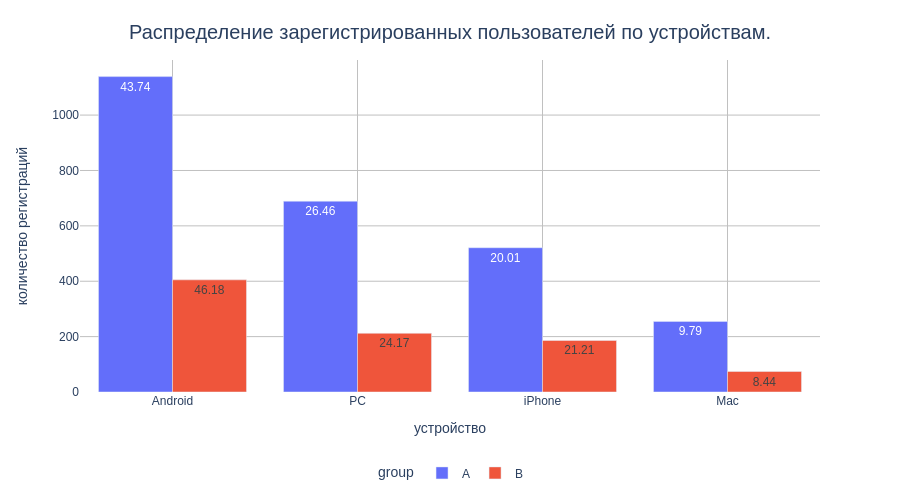

In [45]:
fig = px.bar(
    reg_device, x='device', y='nunique', color='group', text='share'
).update_xaxes(categoryorder='total descending')

#зададим параметры диаграмм
fig.update_layout(
        {'title':{'text':'Распределение зарегистрированных пользователей по устройствам.', 
                  'x': 0.5, 'y': 0.95, 'font_size': 20}}, #название общей диаграммы, расположение текста, размер текста
        barmode = 'group', #вид диаграмм
        legend_orientation="h", 
        legend=dict(x=0.4, y=-0.2),#положение легенды
        autosize=False,
        width=900,
        height=500,
        paper_bgcolor='white',
        plot_bgcolor='white', #фоновый цвет диаграмм
        uniformtext_minsize=8, #мин. размер шрифта данных,
    )
fig.update_xaxes(title_text='устройство', showgrid=True, gridcolor='silver') #ось х
fig.update_yaxes(title_text='количество регистраций', showgrid=True, gridcolor='silver') #ось у
#выводим получившуюся диаграмму
#fig.show() #показать диаграмму
fig.show("png") #показать диаграмму для Github

Распределение по девайсам между группами (в %) практически одинаковое.

Наибольший объем пользователей используют Android устройства, на втором месте PC, меньше всего пользователей пользуются Mac.

#### Количество событий на пользователя.
<a id="analysis3"></a> 

In [46]:
#создадим сводную табоицу по распределению количества событий на пользователя для каждой группы
coun_events_of_us = test_data.pivot_table(index=['group', 'user_id'], values='event_name', aggfunc='count').reset_index()

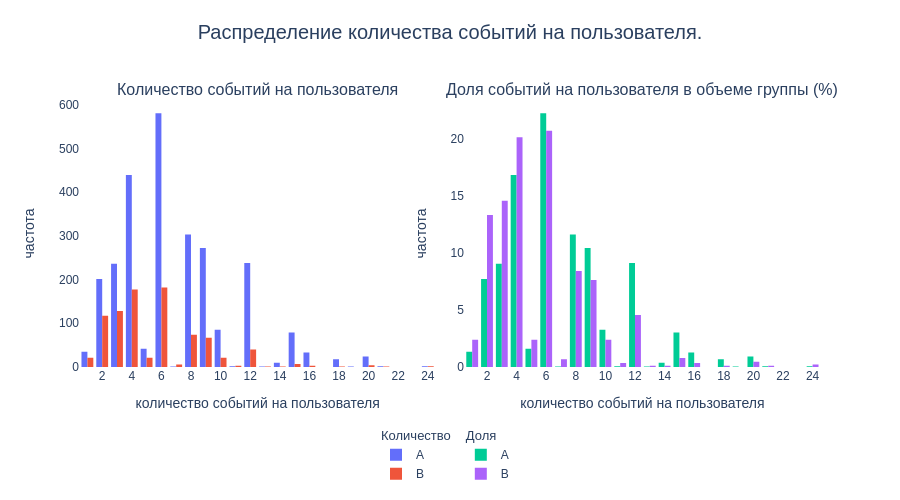

In [47]:
#создадим диаграммы с количеством событий на пользователя  
fig = make_subplots(rows=1, cols=2, #количество строк и столбцов
                    subplot_titles=['Количество событий на пользователя', 
                                    'Доля событий на пользователя в объеме группы (%)'], #названия диаграмм по порядку 
                    shared_yaxes=False, #общая ось у
                    horizontal_spacing=0.04 #пространство между диаграммами 
                   )
#первая диаграмма
fig.add_trace(go.Histogram(
                           x=coun_events_of_us.query('group == "A"')['event_name'], 
                name='A',  legendgroup="group", legendgrouptitle_text='Количество'),1,1)
fig.add_trace(go.Histogram(
                           x=coun_events_of_us.query('group == "B"')['event_name'],  
                name='B', legendgroup="group",),1,1)
#вторая диаграмма
fig.add_trace(go.Histogram(
                           x=coun_events_of_us.query('group == "A"')['event_name'], histnorm='percent', 
                name='A', legendgroup="group2", legendgrouptitle_text='Доля'),1,2)
fig.add_trace(go.Histogram(
                           x=coun_events_of_us.query('group == "B"')['event_name'], histnorm='percent',  
                name='B', legendgroup="group2"),1,2)
#зададим параметры диаграмм
fig.update_layout(
        {'title':{'text':'Распределение количества событий на пользователя.', 
                  'x': 0.5, 'y': 0.95, 'font_size': 20}}, #название общей диаграммы, расположение текста, размер текста
        barmode = 'group', #вид диаграмм
        legend_orientation="h", 
        legend=dict(x=0.4, y=-0.2),#положение легенды
        autosize=False,
        width=900,
        height=500,
        paper_bgcolor='white',
        plot_bgcolor='white', #фоновый цвет диаграмм
        uniformtext_minsize=8, #размер шрифта данных
    )
fig.update_annotations(font_size = 16)
fig.update_xaxes(title_text='количество событий на пользователя', dtick=2) #ось х
fig.update_yaxes(title_text='частота') #ось у
#выводим получившуюся диаграмму
#fig.show() #показать диаграмму
fig.show("png") 

Наибольшее количество событий на пользователя - 24.

В целом между группами распределение схожее. Чаще всего пользователи и групп А и групп В совершают по 6 и 4 события, чуть реже 3 и 2.

**Также найдем среднее и медианное количество событий на одного пользователя для каждой группы.**

In [48]:
count = test_data.pivot_table(index=['group', 'user_id'], values='event_name', aggfunc='count').reset_index()
count = count.groupby('group').agg(
    mean = ('event_name','mean'), 
    median = ('event_name', 'median')).reset_index()
count['mean'] = round(count['mean'])

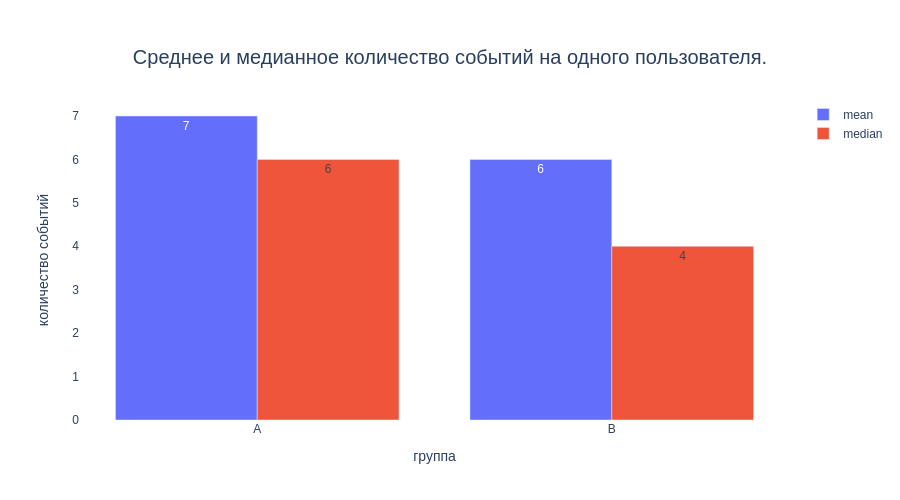

In [49]:
fig = go.Figure()

fig = go.Figure(data=[
    go.Bar(name='mean', x=count['group'], y=count['mean'], text=count['mean']),
        go.Bar(name='median', x=count['group'], y=count['median'], text=count['median']),
])
fig.update_layout(barmode='group') #вид диаграммы Bar

fig.update_layout(
    {'title':{'text':'Среднее и медианное количество событий на одного пользователя.', 'x': 0.5, 'y': 0.9, 'font_size': 20}},
    showlegend=True,
    autosize=False,
    width=900,
    height=500,
    paper_bgcolor='white',
    plot_bgcolor='white',
)
#fig.update_yaxes(title_text='значение', showgrid=True, gridcolor='black')
fig.update_yaxes(title_text='количество событий', showgrid=False, gridcolor='black')
fig.update_xaxes(title_text='группа', showgrid=False)
#fig.show() #показать диаграмму
fig.show("png") #показать диаграмму для Github

В среднем на одного пользователя группы А приходится 7 событий, медианное же значение составляет 6 событий.

На одного пользователя группы В приходится 6 событий в среднем и 4 события по медиане.

Таким образом, в группе А на пользователя приходится больше событий, чем в группе В.

#### Распределение событий пользователей по дням.
<a id="analysis4"></a> 

In [50]:
events_count = test_data.pivot_table(index=['group', 'event_date'], values='user_id', aggfunc='count').reset_index()

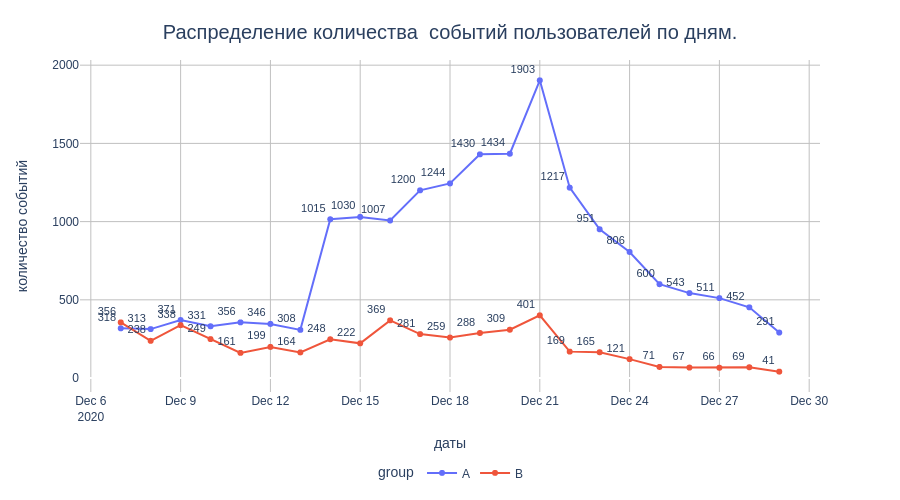

In [51]:
fig = px.line(events_count, x='event_date', y='user_id', color='group', text='user_id')

#зададим параметры диаграмм
fig.update_layout(
        {'title':{'text':'Распределение количества  событий пользователей по дням.', 
                  'x': 0.5, 'y': 0.95, 'font_size': 20}}, #название общей диаграммы, расположение текста, размер текста
        barmode = 'group', #вид диаграмм
        legend_orientation="h", 
        legend=dict(x=0.4, y=-0.2),#положение легенды
        autosize=False,
        width=900,
        height=500,
        paper_bgcolor='white',
        plot_bgcolor='white', #фоновый цвет диаграмм
        uniformtext_minsize=8, #мин. размер шрифта данных,   
    )
fig.update_traces(textposition='top left', textfont_size=11)
fig.update_xaxes(title_text='даты', showgrid=True, gridcolor='silver') #ось х
fig.update_yaxes(title_text='количество событий', showgrid=True, gridcolor='silver') #ось у
#выводим получившуюся диаграмму
#fig.show() #показать диаграмму
fig.show("png") #показать диаграмму для Github

Сразу можно отметить, что, как и по количеству регистраций, количество событий пользователе группы А имеет скачкообразное распределение, и один параметр напрямую зависит от другого. 

В группе В за весь период тестирования динамика одинаковая.

Возможно, что есть какая-то причина, по которой пользователи группы А начали активно регистрироваться и совершать события, однако, по имеющимся данным её не найти.

Под конец тестирования группа А возвращается к изначальным объемам событий.

***Рассмотрим среднюю и медианную суммы покупки пользователей группы А и пользователей группы В.***

In [52]:
test_data.groupby('group').agg(mean = ('details','mean'), \
                                median = ('details', 'median'))

,mean,median
group,,
A,23.09,4.99
B,22.87,4.99


Медианная стоимость покупки для обеих групп одинакова и составляет 4,99 долларов.

А вот средняя стоимость покупки в группе А выше и составляет 23,09 долларов.

В группе В средняя стоимость покупки 22,87 долларов.

#### Анализ изменения конверсии в воронке на разных этапах.
<a id="analysis5"></a> 

In [53]:
#подготовим сводную таблицу с количеством уникальных пользователей на каждом событии по двум группам и общим количеством
event_unique_all = test_data.groupby('event_name').agg(
    {'user_id': 'nunique'}).sort_values('user_id', ascending=False).rename(columns={'user_id':'all groups'})
event_unique_all = event_unique_all.reindex(['login','product_page','product_cart','purchase'])
event_unique_all['% previous all'] = event_unique_all['all groups'] / event_unique_all['all groups'].shift(
    1,fill_value=event_unique_all.max().iat[0]
)
event_unique_all['% initial all'] = event_unique_all['all groups'] / event_unique_all.max().iat[0]

event_unique_all['% initial all'] = event_unique_all['% initial all'].apply('{:.0%}'.format)
event_unique_all['% previous all'] = event_unique_all['% previous all'].apply('{:.0%}'.format)

In [54]:
event_unique_A = test_data.query('group == "A"').groupby(['event_name']).agg(
    {'user_id': 'nunique'}).sort_values('user_id', ascending=False).rename(columns={'user_id':'group A'})

event_unique_A = event_unique_A.reindex(['login','product_page','product_cart','purchase'])
event_unique_A['% previous A'] = event_unique_A['group A'] / event_unique_A['group A'].shift(
    1,fill_value=event_unique_A.max().iat[0]
)

event_unique_A['% initial A'] = event_unique_A['group A'] / event_unique_A.max().iat[0]

event_unique_A['% initial A'] = event_unique_A['% initial A'].apply('{:.0%}'.format)
event_unique_A['% previous A'] = event_unique_A['% previous A'].apply('{:.0%}'.format)

In [55]:
event_unique_B = test_data.query('group == "B"').groupby(['event_name']).agg(
    {'user_id': 'nunique'}).sort_values('user_id', ascending=False).rename(columns={'user_id':'group B'})

event_unique_B = event_unique_B.reindex(['login','product_page','product_cart','purchase'])
event_unique_B['% previous B'] = event_unique_B['group B'] / event_unique_B['group B'].shift(
    1,fill_value=event_unique_B.max().iat[0]
)

event_unique_B['% initial B'] = event_unique_B['group B'] / event_unique_B.max().iat[0]

event_unique_B['% initial B'] = event_unique_B['% initial B'].apply('{:.0%}'.format)
event_unique_B['% previous B'] = event_unique_B['% previous B'].apply('{:.0%}'.format)

In [56]:
event_unique_concat = pd.concat([
    event_unique_all,
    event_unique_A,
    event_unique_B],
    axis=1
)

In [57]:
event_unique_concat

,all groups,% previous all,% initial all,group A,% previous A,% initial A,group B,% previous B,% initial B
event_name,,,,,,,,,
login,3480,100%,100%,2604,100%,100%,876,100%,100%
product_page,2178,63%,63%,1685,65%,65%,493,56%,56%
product_cart,1026,47%,29%,782,46%,30%,244,49%,28%
purchase,1082,105%,31%,833,107%,32%,249,102%,28%


***Построим воронку событий, совершенных уникальными пользователями двух групп тестирования.***

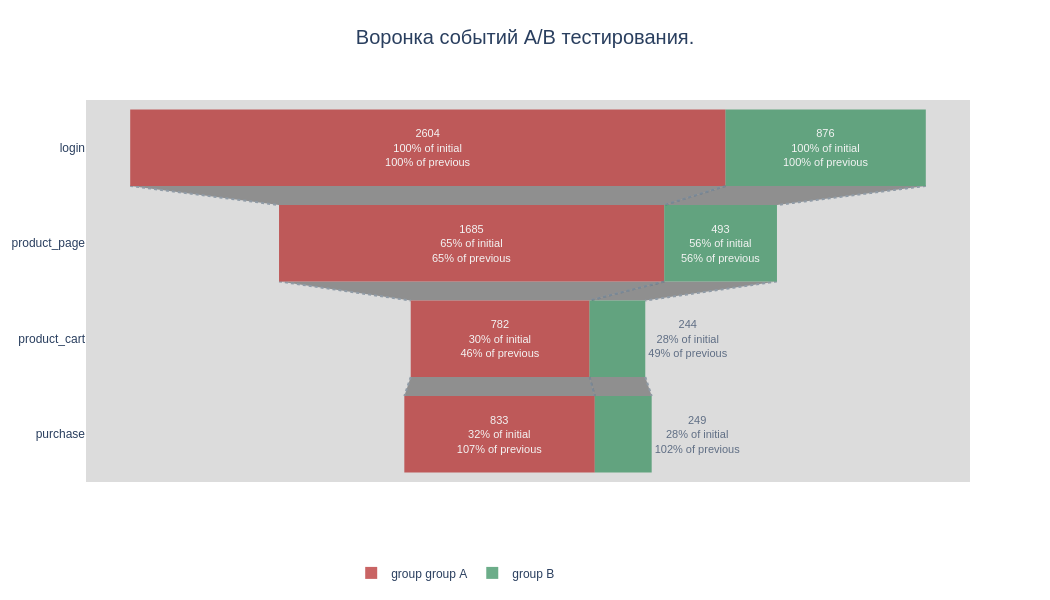

In [58]:
fig = go.Figure()


fig.add_trace(go.Funnel(
    name = 'group group A',
    orientation = 'h',    
    y = event_unique_concat.reset_index()['event_name'].tolist(),
    x = event_unique_concat.reset_index()['group A'].tolist(),
    textinfo = 'value+percent initial+percent previous',
    opacity = 0.7, marker = {'color': ['firebrick', 'firebrick', 'firebrick', 'firebrick']},
    connector = {'line': {'color': 'slategray', 'dash': 'dot', 'width': 2}}))

fig.add_trace(go.Funnel(
    name = 'group B',
    orientation = 'h',
    y = event_unique_concat.reset_index()['event_name'].tolist(),
    x = event_unique_concat.reset_index()['group B'].tolist(),
    textposition = 'auto',
    textinfo = 'value+percent initial+percent previous',
    opacity = 0.7, marker = {'color': ['seagreen', 'seagreen', 'seagreen', 'seagreen']},
    connector = {'line': {'color': 'slategray', 'dash': 'dot', 'width': 2}}))

fig.update_layout(
        {'title':{'text':'Воронка событий А/В тестирования.', 
                  'x': 0.5, 'y': 0.95, 'font_size': 20}},#название общей диаграммы, расположение текста, размер текста
        width=1050,
        height=600,
        legend_orientation="h", 
        legend=dict(x=0.3, y=-0.2),#положение легенды
        plot_bgcolor='gainsboro', #фоновый цвет диаграмм
    )
fig.update_traces(textfont_size=11)
#fig.update_yaxes(title_text='название события') #ось у

#fig.show() #показать диаграмму
fig.show("png") #показать диаграмму для Github

Рассмотрев воронку событий по группам А и В, можно отметить следующее:
- процент потери пользователей от первого события login к:
    - событию product_page у группы А - 35 %, у группы В - 44%
    - событию product_cart у группы А - 70 %, у группы В - 78%
    - событию purchase у группы А - 68 %, у группы В - 72%
Также можно заметить, что логическая последовательность воронки событий: "авторизация - страница товара - корзина - оплата" нарушается. Все потому, что данная воронка является достаточно гибкой, и пользователи могут оплачивать свои заказы, не заходя в корзину, а находясь на странице с товаром. Также возможны и другие вариации между событиями.

В общем итоге можно заметить, что по всем событиям после авторизации, конверсия у группы А выше, чем у группы В. 

Так к событию product_page перешло на 9 п.п пользователей группы А больше, чем в группе В. 

К событию product_cart препершло на 2 п.п пользователей группы А больше, чем в группе В. 

К событию purchase препершло на 4 п.п пользователей группы А больше, чем в группе В.

#### Особенности данных, которые нужно учесть, прежде чем приступать к A/B-тестированию.
<a id="analysis6"></a> 

Необходимо отметить следующие особенности:
- тестирование было завершено на 5 дней раньше;
- одновременно проводились 2 А/В тестирования, в результате образовались задублировавшиеся между двумя тестами пользователи:
    - Всего 1602 пользователя.
    - Из них 819 пользователей из группы А второго теста.
    - Однако остальные 783 пользователя принадлежат группе B второго теста. На таких пользователей могут повлиять вводимые изменения другого теста. 
    - Чтобы не снижать мощность нашего теста, было проверено как пользователи группы В второго теста распределены между группами нашего теста при помощи стат. теста. Результат показал, что распределение можно считать равным и все пользователи были сохранены.
- в данных есть пользователи, которые не совершили после регистрации ни одного события:
    - размер таких пользователей - 2870;
    - их объем - 45,19%
    - распределение между группами: группа А - 64,11%, группа В - 35,89%
- так как данных по этим пользователям недостаточно, они были отстранены
- в период проведения тестирования также осуществлялись акция Christmas&New Year Promo, следовательно клиенты тестирования могли попасть под её воздействие;
- тестирование проводится в предпраздничный период, что является негативным фактором проведения А/В тестирования, так как календарные события и праздники значительно искажают покупательский спрос и, следовательно, могут значительно повлиять и на результаты проведения тестирования, а именно исказить и их.

- при проверке распределения регистраций пользователей и распределения количества событий был замечен значительный подъем у группы А на 14 декабря и 21 декабря, однако такой рост не коснулся группы В. 

### Оценка результатов A/B-тестирования
<a id="result0"></a> 

#### Результаты A/В-тестирования.
<a id="result1"></a> 

- В среднем на одного пользователя группы А приходится 7 событий, медианное же значение составляет 6 событий. На одного пользователя группы В приходится 6 событий в среднем и 4 события по медиане.
    - Таким образом, ***в группе А на пользователя приходится больше событий, чем в группе В.***
- Медианная стоимость покупки для обеих групп одинакова и составляет 6,99 долларов. А вот ***средняя стоимость покупки в группе А выше*** и составляет 23,09 долларов. В группе В средняя стоимость покупки 22,87 долларов.
- В общем итоге можно заметить, что ***по всем событиям после авторизации, конверсия у группы А выше, чем у группы В.***
    - Так к событию product_page перешло на 9 п.п пользователей группы А больше, чем в группе В.
    - К событию product_cart препершло на 2 п.п пользователей группы А больше, чем в группе В.
    - К событию purchase препершло на 4 п.п пользователей группы А больше, чем в группе В.



#### Проверка статистической разницы долей z-критерием.
<a id="test"></a> 

***Проверим, находят ли статистические критерии разницу между выборками контрольной группы А и тестовой группы В по событиям 'product_page', 'product_cart', 'purchase'.***

Так как тестирование имеет множественные сравнения необходимо снизить вероятность ложнопозитивного результата.
    
Чтобы снизить вероятность ложнопозитивного результата при множественном тестировании гипотез, применяют разные методы корректировки уровня значимости для уменьшения FWER.

**Метод Бонферрони (поправка Бонферрони):**

Самая грубая и распространённая поправка к требуемым уровням значимости. Уровни значимости в каждом из m сравнений в m раз меньше, чем уровень значимости, требуемый при единственном сравнении. Проще говоря, делят уровень значимости ɑ на число гипотез:

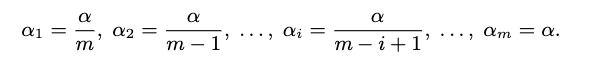


**Метод Холма**

Метод Холма также гарантирует FWER < ɑ, но предъявляет более мягкие требования к уровню значимости. Метод пошаговый: для первого сравнения требуемый уровень значимости равен отношению ɑ к числу попарных сравнений, для второго — отношению ɑ к (числу сравнений - 1) и так далее. Для последнего сравнения уровень значимости будет равен ɑ:

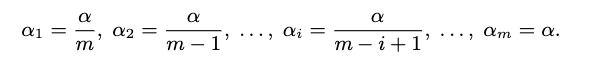

**Метод Шидака**

Метод Шидака также обеспечивает FWER < ɑ. Скорректированное значение требуемого уровня значимости рассчитывается по формуле: 

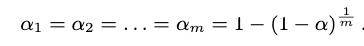

Например, при ɑ = 0.05 и при двух сравнениях требуемый уровень значимости рассчитывают так: 1 - (1 - 0.05)^(1/2) = 0.0253, а при 4 сравнениях: 1 - (1 - 0.05)^(1/4) = 0.0127.

Сформулируем гипотезы.

**Нулевая гипотеза: Н0 = Различий между выборками контрольной группы А и тестовой группы В нет.(для каждого события)**

**Альтернативная гипотеза: H_a: = Различия между выборками контрольной группы А и тестовой группы В есть.(для каждого события)**

В качестве уровня критической значимости установим 0.05

In [59]:
hypotheses_table = event_unique_concat[['all groups', 'group A' ,'group B']].reset_index()
hypotheses_table

,event_name,all groups,group A,group B
0,login,3480,2604,876
1,product_page,2178,1685,493
2,product_cart,1026,782,244
3,purchase,1082,833,249


In [60]:
def statistical_significance (df, alpha, for_method=False):
#создадим переменную в которую будут помещаться значения p-value при выполнении цикла    
    p_v = []
    event = ['product_page', 'product_cart', 'purchase']
    for x in event:
        event_df = df[df['event_name'] == x]
        successes1 = event_df['group A'].iat[0]
        successes2 = event_df['group B'].iat[0]
        trials1 = df['group A'].iloc[0]
        trials2 = df['group B'].iloc[0]

        successes = np.array([successes1, successes2])
        trials = np.array([trials1, trials2])

        p1 = successes[0]/trials[0]
        p2 = successes[1]/trials[1]
        
        #print(trials[0], trials[1])
    
        p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

        difference = p1 - p2 

        z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))
        
        distr = st.norm(0, 1)  
        p_value = (1 - distr.cdf(abs(z_value))) * 2
        
        p_v.append(p_value)#наполним список
        
#при значении False функция выведет необходимую информацию по тесту(без изменений)        
        if for_method == False:  
            print('Между группами A и В по событию', '\033[1m' + f'{x}' + '\033[0m')
            print('p-значение: ', p_value)
            print(successes)
            print(trials)
            if p_value < alpha:
                print('Отвергаем H0: между долями есть значимая разница')
                print(' ')
            else:
                print('\033[1m' + 'Не получилось отвергнуть H0: нет оснований считать доли разными' + '\033[0m')
                print(' ')
#при значении True функция выведет список со списками значений p-value по каждому событию
    if for_method == True:
        return p_v


**Проверим гипотезы применяя поправку Бонферрони.**

In [61]:
statistical_significance(hypotheses_table, alpha=.05/3, for_method=False)

Между группами A и В по событию product_page
p-значение:  8.195976000324734e-06
[1685  493]
[2604  876]
Отвергаем H0: между долями есть значимая разница
 
Между группами A и В по событию product_cart
p-значение:  0.2215941567364419
[782 244]
[2604  876]
Не получилось отвергнуть H0: нет оснований считать доли разными
 
Между группами A и В по событию purchase
p-значение:  0.04864766695042433
[833 249]
[2604  876]
Не получилось отвергнуть H0: нет оснований считать доли разными
 


Из трех гипотез статистическим тестом было подтверждено 2 нулевые гипотезы по событиям product_cart и purchase, а также отвегнута нулевая гипотеза по событию product_page.

**Проверим гипотезы применяя поправку Шидака.**

In [62]:
alpha_Danna_Shidak = 1 - (1 - 0.05)**(1/3)
print('Уровень alpha с поправкой Шидака',  alpha_Danna_Shidak)
print(' ')
statistical_significance(hypotheses_table, alpha=alpha_Danna_Shidak, for_method=False)

Уровень alpha с поправкой Шидака 0.016952427508441503
 
Между группами A и В по событию product_page
p-значение:  8.195976000324734e-06
[1685  493]
[2604  876]
Отвергаем H0: между долями есть значимая разница
 
Между группами A и В по событию product_cart
p-значение:  0.2215941567364419
[782 244]
[2604  876]
Не получилось отвергнуть H0: нет оснований считать доли разными
 
Между группами A и В по событию purchase
p-значение:  0.04864766695042433
[833 249]
[2604  876]
Не получилось отвергнуть H0: нет оснований считать доли разными
 


Результат с поправкой Шидака идентичен предыдущей проверке.

**Также проверим статистические гипотезы с поправкой Холма, используя библиотеку statsmodels.**

In [63]:
#сохраним список с получившимися значениями p_value
p_value_result = statistical_significance(hypotheses_table, alpha=.05, for_method=True)

#используем библиотеку
print(sorted(p_value_result))
print(' ')
print("FWER: " + str(multipletests(sorted(p_value_result), alpha=0.05, 
                    method='holm', is_sorted = True)))

[8.195976000324734e-06, 0.04864766695042433, 0.2215941567364419]
 
FWER: (array([ True, False, False]), array([2.45879280e-05, 9.72953339e-02, 2.21594157e-01]), 0.016952427508441503, 0.016666666666666666)


Первый список со значениями True и False показывает, что первую нулевую гипотезу по событию product_page со значением p_value=8.19... отвергаем, остальные же гипотезы отвергнуть нельзя.

Результат с поправкой Холма идентичен двум предыдущим.

**Таким образом, результаты статистических тестов со всеми 3 поправками имеют одинаковый результат.**

- Различия между выборками контрольной группы А и тестовой группы В по событию product_page есть;
- Различий между выборками контрольной группы А и тестовой группы В по событию product_cart нет;
- Различий между выборками контрольной группы А и тестовой группы В по событию purchase нет.

### Выводы по исследованию
<a id="rec"></a> 

***Опишите выводы по этапу исследовательского анализа данных и по проведённой оценке результатов A/B-тестирования. Сделайте общее заключение о корректности проведения теста.***

**Предоставленные данные изначально отвечали требованиям технического задания так:**
- **временной интервал набора пользователей - соответствует тех. заданию;**

- **временной интервал тестирования - дата начала соответствует, дата окончания не соответствует тест закончился раньше на 5 дней;**

- **процент набора новых пользователей из региона EU в тест - соответствует техническому заданию и составляет 15%;**

- **количество пользователей соответствует ожидаемому количеству участников теста;**

Однако одновременно проводились 2 А/В тестирования, в результате образовались задублировавшиеся между двумя тестами пользователи:
- Всего 1602 пользователя.
- Из них 819 пользователей из группы А второго теста.
- Однако остальные 783 пользователя принадлежат группе B второго теста. На таких пользователей могут повлиять вводимые изменения другого теста. Чтобы не снижать мощность нашего теста, было проверено как пользователи группы В второго теста распределены между группами нашего теста при помощи стат. теста. Результат показал, что распределение можно считать равным и все пользователи были сохранены.
В данных есть пользователи не совершили после регистрации ни одного события:
- размер таких пользователей - 2870;
- их объем - 45,19%
- распределение между группами: группа А - 64,11%, группа В - 35,89%. Так как данных по этим пользователям недостаточно, они были отстранены;
Количество событий, которые совершаются более, чем на 14 день - 588.

**После обработки данных по вышеизложенным пунктам соответствие данных техническому заданию:**

- **временной интервал набора пользователей - соответствует тех. заданию;**

- **временной интервал тестирования - дата начала соответствует, дата окончания не соответствует + смещение на -1 день;**

- **процент набора новых пользователей из региона EU в тест - не соответствует техническому заданию и составляет 8,22%;**

- **количество пользователей не соответствует ожидаемому количеству участников теста в тех. задании**

- данных на 14 день с момента регистрации пользователя слишком мало, поэтому рассматриваться метрики будут за 1-14 дни регистрации пользователя.


**Также следует отметить следующие особенности текущего А/В тестирования:**
- в период проведения тестирования осуществлялась акция Christmas&New Year Promo, следовательно клиенты тестирования могли попасть под её воздействие;

- тестирование проводится в предпраздничный период, что является негативным фактором проведения А/В тестирования, так как календарные события и праздники значительно искажают покупательский спрос и, следовательно, могут значительно повлиять и на результаты проведения тестирования, а именно исказить и их.

- распределение на группы тестирования неравномерное, группа А имеет вес 78,75%, а группа В 21,25%.

- при проверке распределения регистраций пользователей и распределения количества событий был замечен значительный подъем у группы А на 14 декабря и 21 декабря, однако такой рост не коснулся группу В.


**По результатам исследовательского анализа группы А и группы В тестирования:**
- В среднем на одного пользователя группы А приходится 7 событий, медианное же значение составляет 6 событий. На одного пользователя группы В приходится 6 событий в среднем и 4 события по медиане. Таким образом, в группе А на пользователя приходится больше событий, чем в группе В.

- Медианная стоимость покупки для обеих групп одинакова и составляет 6,99 долларов. А вот средняя стоимость покупки в группе А выше и составляет 23,09 долларов. В группе В средняя стоимость покупки 22,87 долларов.

- В общем итоге можно заметить, что по всем событиям после авторизации, конверсия у группы А выше, чем у группы В.
    - Так к событию product_page перешло на 9 п.п пользователей группы А больше, чем в группе В.
    - К событию product_cart препершло на 2 п.п пользователей группы А больше, чем в группе В.
    - К событию purchase препершло на 4 п.п пользователей группы А больше, чем в группе В.
    
**Проверка статистическим тестом распределений пользователей групп А и В теста по событиям показала следующие результаты:**
- Различия между выборками контрольной группы А и тестовой группы В по событию product_page есть;
- Различий между выборками контрольной группы А и тестовой группы В по событию product_cart нет;
- Различий между выборками контрольной группы А и тестовой группы В по событию purchase нет.

**Подводя общий итог по тестированию А/В, можно признать тест завершенным и сказать, что за период исследования  новая платёжная воронка оказалась неэффективна. За 14 дней с момента регистрации пользователи группы В не показали улучшение ни одной из метрик на 10% и более% по событиям:**
- конверсии в просмотр карточек товаров — событие `product_page`,
- просмотры корзины — `product_cart`,
- покупки — `purchase`.

В качестве рекомендаций, стоит отметить, что для проведения тестирования стоит выбирать наиболее независимый от праздников период, также либо не проводить одновременно два А/В теста, либо следить за тем, чтобы пользователи распределялись корректным образом.